<a href="https://colab.research.google.com/github/qChenSKIM/claims_topic_modeling/blob/main/topic_modeling_top2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Top2Vec

https://github.com/ddangelov/Top2Vec


1. create jointly embedded docuemnt and word vectors using Doc2Vec or Universal sentence embedding or Bert sentence transformer
2. Create lower dimensional embedding of document vectors using UMAP.
3. Find dense areas of documents using HDBSCAN.
4. For each dense area calculate the centroid of document vectors in original dimension, this is the topic vector.
5. Find n-closest word vectors to the resulting topic vector.




In [1]:
!pip install top2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
     |████████████████████████████████| 5.2 MB 16.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 2.3 MB/s 
     |████████████████████████████████| 1.1 MB 69.0 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340685 sha256=32cddcd35eeea528ed874c0823ba760480916d4bb54c64df7e26d744c2df88c1
  Stored in directory: /root/.cache/pip/wheels/93/78/2e/03ee191669a772e9653260aa3bd53e0b1a768751a9676e8c82
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=c6630e2c8b08654ef344c50ed543c4f44ab4ae88ea375d4c9dfbb02044972d52
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Creat

In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from collections import defaultdict
from gensim import corpora
import pandas as pd

In [3]:
documents = inputs =['Has a white color.', 'Has a color that matches the taste.',
       'Interesting shape', 'Looks well stocked.', 'Has a soft texture.',
       'Has smooth edges.', 'Feels easy to squeeze.',
       'Feels comfortable between the gums and lips.',
       'Provides the same satisfaction as other nicotine products, e.g. cigarettes, vape, snus, heat-not-burn tobacco products, etc.',
       'More enjoyable to use than other nicotine products, such as cigarettes, vaping, heat-not-burn tobacco products, etc.',
       ' Provides a pleasant tingling sensation on the gums.',
       'Does not cause drooling in the mouth or throat.',
       'Invisible when placed between gums & lips (no protrusion).',
       'Spit free No need to spit while using.',
       'It feels comfortable to talk or laugh while using.',
       'Remain in position and do not move once placed in the mouth.',
       'Has less health risks than cigarettes, for example, contains fewer toxins & harmful chemicals.',
       'Does not cause irritation to the tongue.',
       'Does not cause irritation to the gums.',
       'Does not cause throat irritation.',
       'Made from food-grade ingredients.', 'Tobacco free.',
       'Made of high quality materials.',
       'Made from natural ingredients.',
       'Does not disturb others, for example there is no smell of smoke or vape vapor.',
       'Can be used anytime, anywhere.',
       'Not messy, unlike snus/snuff or chewing tobacco.',
       'Easy to use. No matches, macis or charger needed',
       'It feels satisfying.', 'It feels like it lasts a long time.',
       'Has a delicious aftertaste in the mouth.',
       'The smell is delicious', 'Releases long-lasting nicotine.',
       'Get rid of nicotine straight away.',
       'Has varying levels of nicotine.',
       'Delivers nicotine through absorption. No need to suck or chew.',
       'Does not stain teeth or fingers like cigarettes.',
       'Does not leave a smoky or unpleasant odor on hair or clothes like cigarettes.',
       'Does not cause breath smell like cigarettes.',
       'Does not cause premature skin aging like cigarettes',
       'Environmentally friendly, for example 100% biodegradable',
       'The cans are made of 100% recyclable and recyclable plastic.',
       'The cans are made of environmentally friendly materials, such as paper/pulp.',
       'Made in an environmentally friendly way.', 'The shape is slim.',
       'Mini shape.', 'Moist texture', 'The texture is dry.',
       'Can be used at any time, for example after waking up, while traveling, at work, etc.',
       'Suitable for socializing moments, for example with adult friends, family, or coworkers.',
       'Can be used without having to take special time, for example, no need to take a break to smoke.',
       'Comes in various flavors that suit certain moments, for example the taste of coffee after coffee',
       'Made by experts, for example taste experts.',
       'Made in Indonesia.',
       'Made in the Nordic region, for example Sweden or Denmark.',
       'Undergo rigorous scientific testing.',
       'Comes from a trusted and well-known brand.',
       'Comes from the best selling brand.',
       'Comes from a premium brand.',
       'Coming from a brand I can understand/feel familiar with.',
       ' No need to inhale smoke or vape (unlike, for example, cigarettes/heat-not-burn or vaping products',
       'Does not stick between gums & lips when removed.',
       'Can be placed in different locations between the gums & lips.',
       'Easy to take out of the can.',
       'Has a variety of different flavors', 'Has an intense taste.',
       'It tastes sweet.',
       'Has a cool/refreshing taste, like mint or menthol.',
       'Offers a cleaner experience than cigarettes, e.g. without fire, ash, smoke or unpleasant odors.',
       'Can be disposed of in the disposal container at the top of the can lid.',
       'Each one is wrapped in paper.',
       'Has a paper slip that can be used to dispose of used bags.',
       "Doesn't make me feel judged by others (compared to eg cigarettes).",
       'Is an alternative to nicotine products that makes me feel socially acceptable.',
       'Is an alternative to nicotine products that makes me feel that I am making a better choice.',
       'Is an alternative to nicotine products that makes me feel progressive & modern.',
       'The can is easy to open & close.',
       'The can feels durable & sturdy.',
       ' The nicotine bag looks neat & organized when I open the can.',
       'The can keeps the nicotine pouch fresh over time.']

In [ ]:
# documents

# Train model

In [4]:
!pip install top2vec[sentence_encoders]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.9 MB 27.6 MB/s 
     |████████████████████████████████| 578.0 MB 17 kB/s 
INFO: pip is looking at multiple versions of tensorflow-text to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 4.6 MB 52.4 MB/s 


# universal-sentence-encoder-large

In [5]:
from top2vec import Top2Vec

# model = Top2Vec(documents,speed="learn", workers=2)

# * doc2vec
# * universal-sentence-encoder
# * universal-sentence-encoder-large
# * universal-sentence-encoder-multilingual
# * universal-sentence-encoder-multilingual-large
# * distiluse-base-multilingual-cased
# * all-MiniLM-L6-v2
# * paraphrase-multilingual-MiniLM-L12-v2
            
model = Top2Vec(documents,
                embedding_model="universal-sentence-encoder-large",
                min_count=1,embedding_batch_size=4,chunk_length=10)

2022-11-07 06:44:27,366 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-11-07 06:44:27,378 - top2vec - INFO - Downloading universal-sentence-encoder-large model
INFO:top2vec:Downloading universal-sentence-encoder-large model
2022-11-07 06:44:48,354 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-11-07 06:44:55,079 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-11-07 06:45:01,975 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-11-07 06:45:01

**should only get 1 if well clustered**

In [6]:
model.get_num_topics()

2

In [7]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [8]:
topic_sizes

array([41, 39])

In [9]:
topic_nums

array([0, 1])

In [10]:
topic_words, word_scores, topic_nums = model.get_topics(2)

In [11]:
topic_words

array([['nicotine', 'tobacco', 'cigarettes', 'snus', 'vaping', 'smoke',
        'vape', 'gums', 'spit', 'flavors', 'smell', 'coffee', 'lips',
        'taste', 'throat', 'mouth', 'not', 'irritation', 'matches',
        'without', 'unpleasant', 'burn', 'unlike', 'no', 'delicious',
        'brand', 'paper', 'free', 'alternative', 'provides', 'does',
        'products', 'texture', 'cans', 'different', 'ingredients',
        'feel', 'comfortable', 'using', 'recyclable', 'use',
        'environmentally', 'feels', 'friendly', 'makes', 'looks',
        'color', 'materials', 'time', 'with'],
       ['taste', 'texture', 'delicious', 'flavors', 'smell',
        'unpleasant', 'feels', 'irritation', 'feel', 'gums', 'spit',
        'friendly', 'comfortable', 'ingredients', 'shape', 'tobacco',
        'lips', 'smoke', 'nicotine', 'snus', 'throat', 'vape', 'easy',
        'color', 'vaping', 'burn', 'coffee', 'provides', 'mouth',
        'looks', 'like', 'does', 'cigarettes', 'matches', 'well',
       

In [ ]:
word_scores

array([[ 0.9916956 ,  0.99061847,  0.98945385,  0.9894495 ,  0.9893608 ,
         0.98818   ,  0.9877294 ,  0.98715144,  0.9868041 ,  0.9863404 ,
         0.98633957,  0.98590374,  0.9855873 ,  0.9844887 ,  0.98421943,
         0.98391   ,  0.9837479 ,  0.9834457 ,  0.9830754 ,  0.98268443,
         0.98206073,  0.9818406 ,  0.98174244,  0.98166984,  0.98104894,
         0.9808615 ,  0.9807476 ,  0.98058873,  0.98019314,  0.9796626 ,
         0.9790436 ,  0.97896665,  0.97881824,  0.9787295 ,  0.97713804,
         0.9767632 ,  0.9766516 ,  0.9765043 ,  0.9763731 ,  0.9763073 ,
         0.9762324 ,  0.97622466,  0.97597873,  0.97429   ,  0.9734719 ,
         0.9726971 ,  0.9722282 ,  0.9721212 ,  0.9706863 ,  0.97004306],
       [-0.4986801 , -0.49965134, -0.50256747, -0.50562257, -0.5139477 ,
        -0.52793145, -0.5460438 , -0.5772677 , -0.57893604, -0.5879971 ,
        -0.59409195, -0.59547365, -0.6044368 , -0.6078966 , -0.6082929 ,
        -0.60885495, -0.6118947 , -0.6119845 , -0.

In [12]:
topic_nums

array([0, 1])

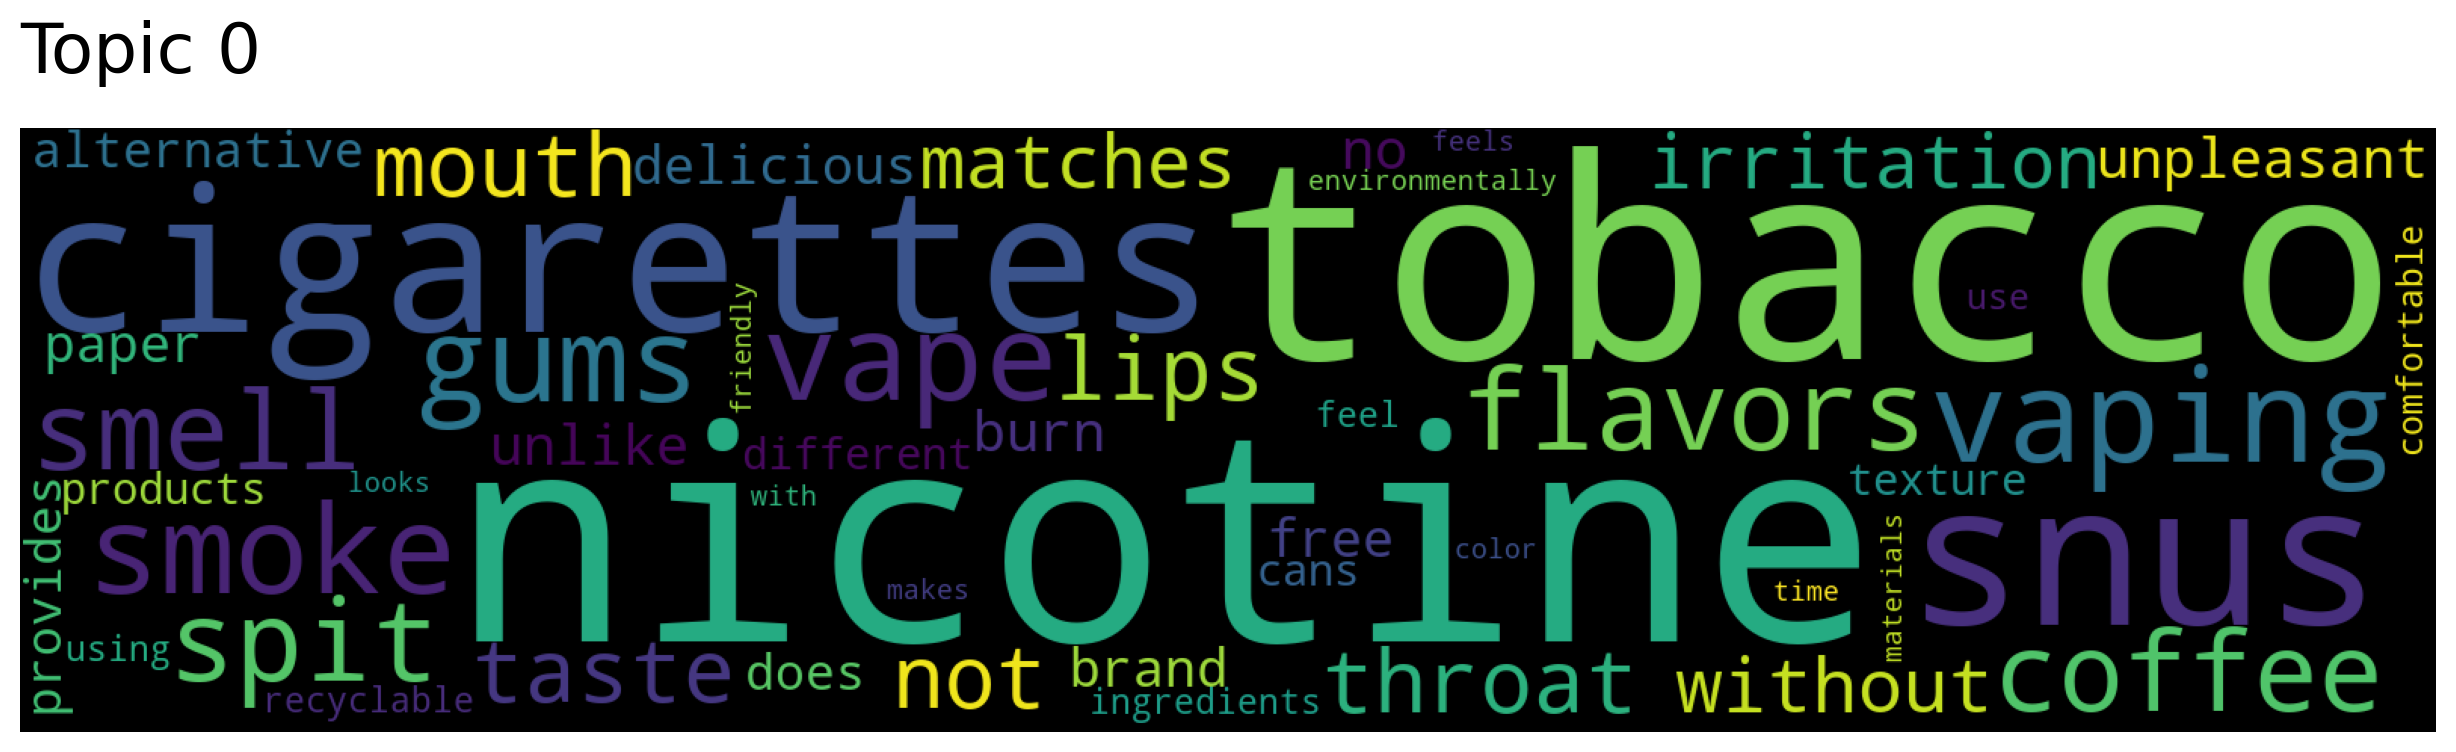

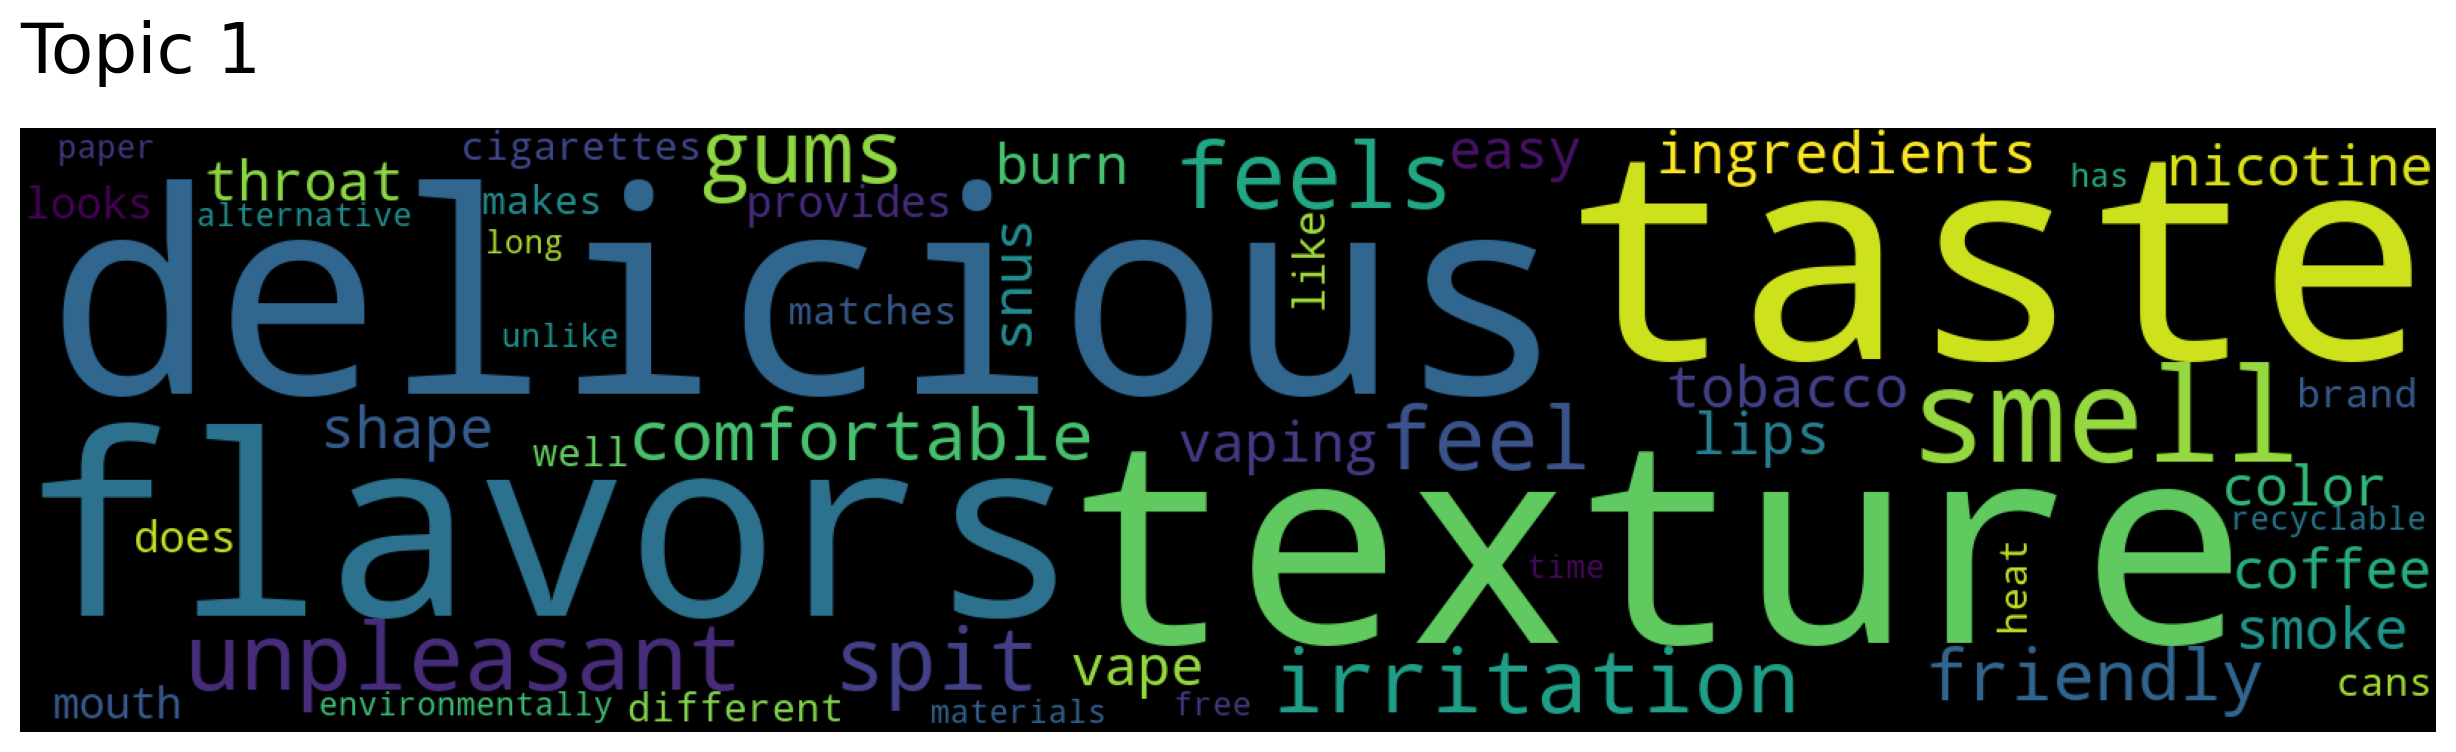

In [13]:
topic_words, word_scores, topic_nums = model.get_topics(2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

# search topic
We are going to search for topics most similar to **health**.

topic_words: For each topic the top 50 words are returned, in order of semantic similarity to topic.

word_scores: For each topic the cosine similarity scores of the top 50 words to the topic are returned.

topic_scores: For each topic the cosine similarity to the search keywords will be returned.

topic_nums: The unique index of every topic will be returned.

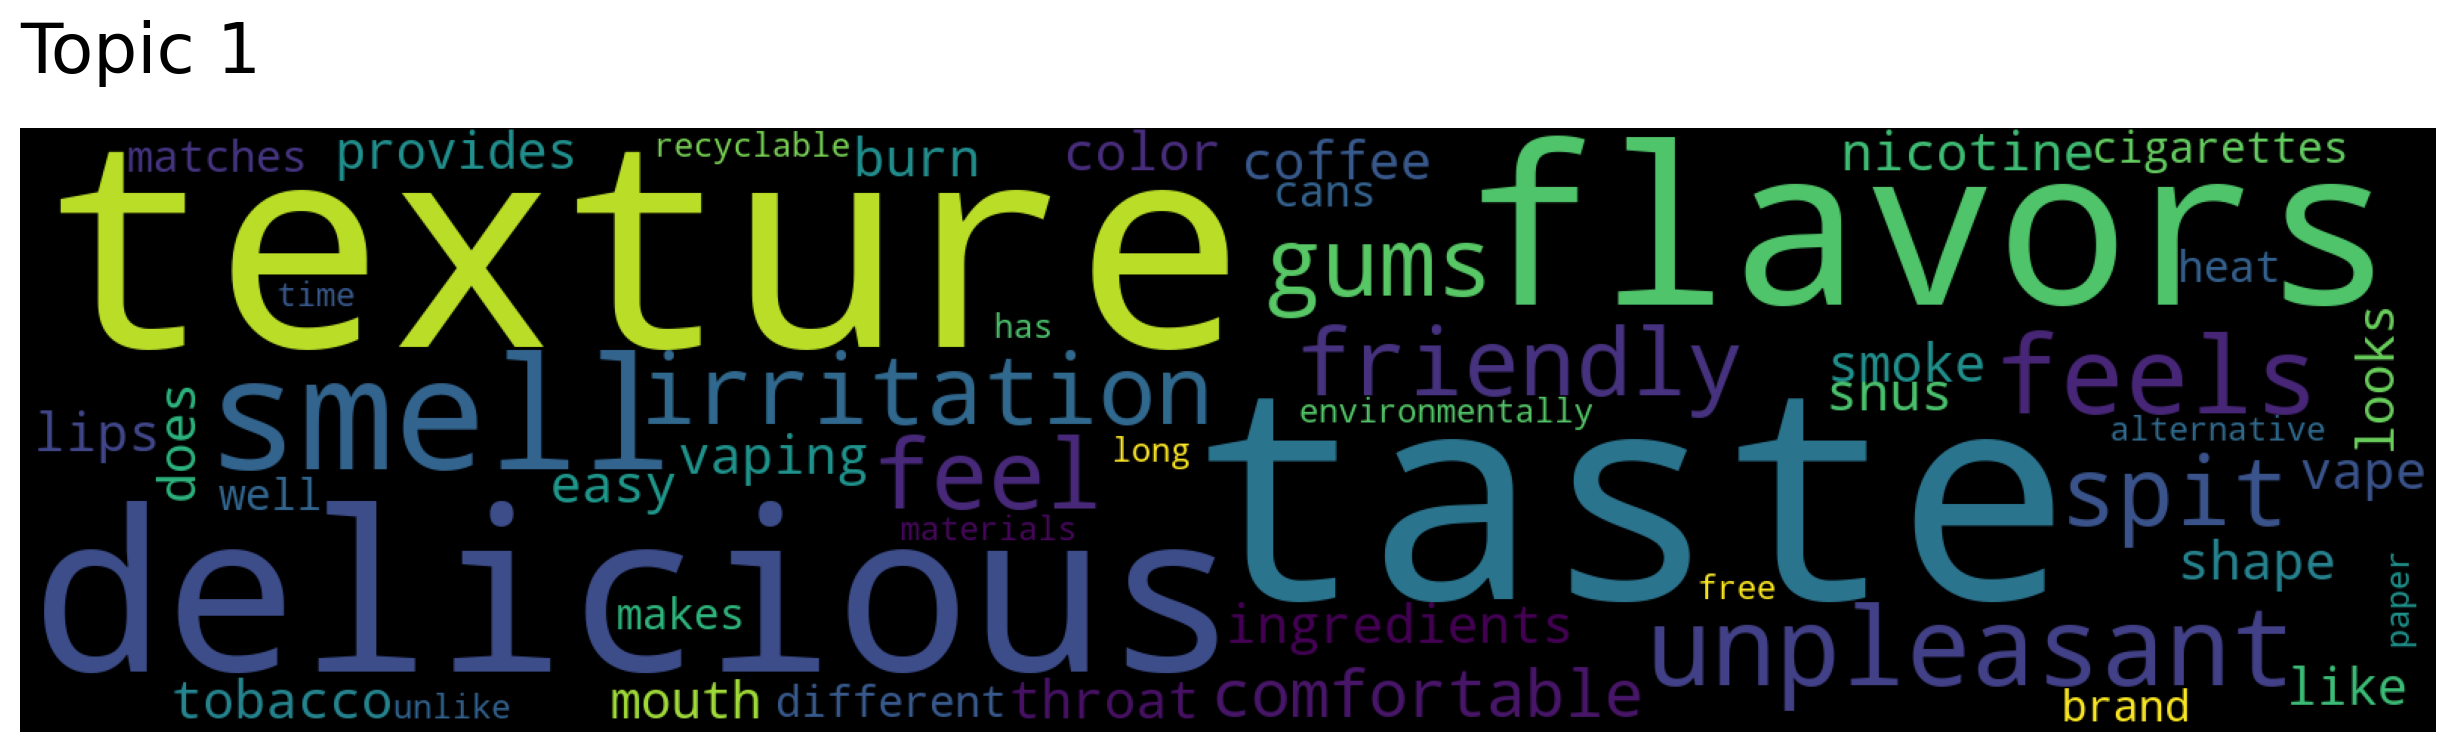

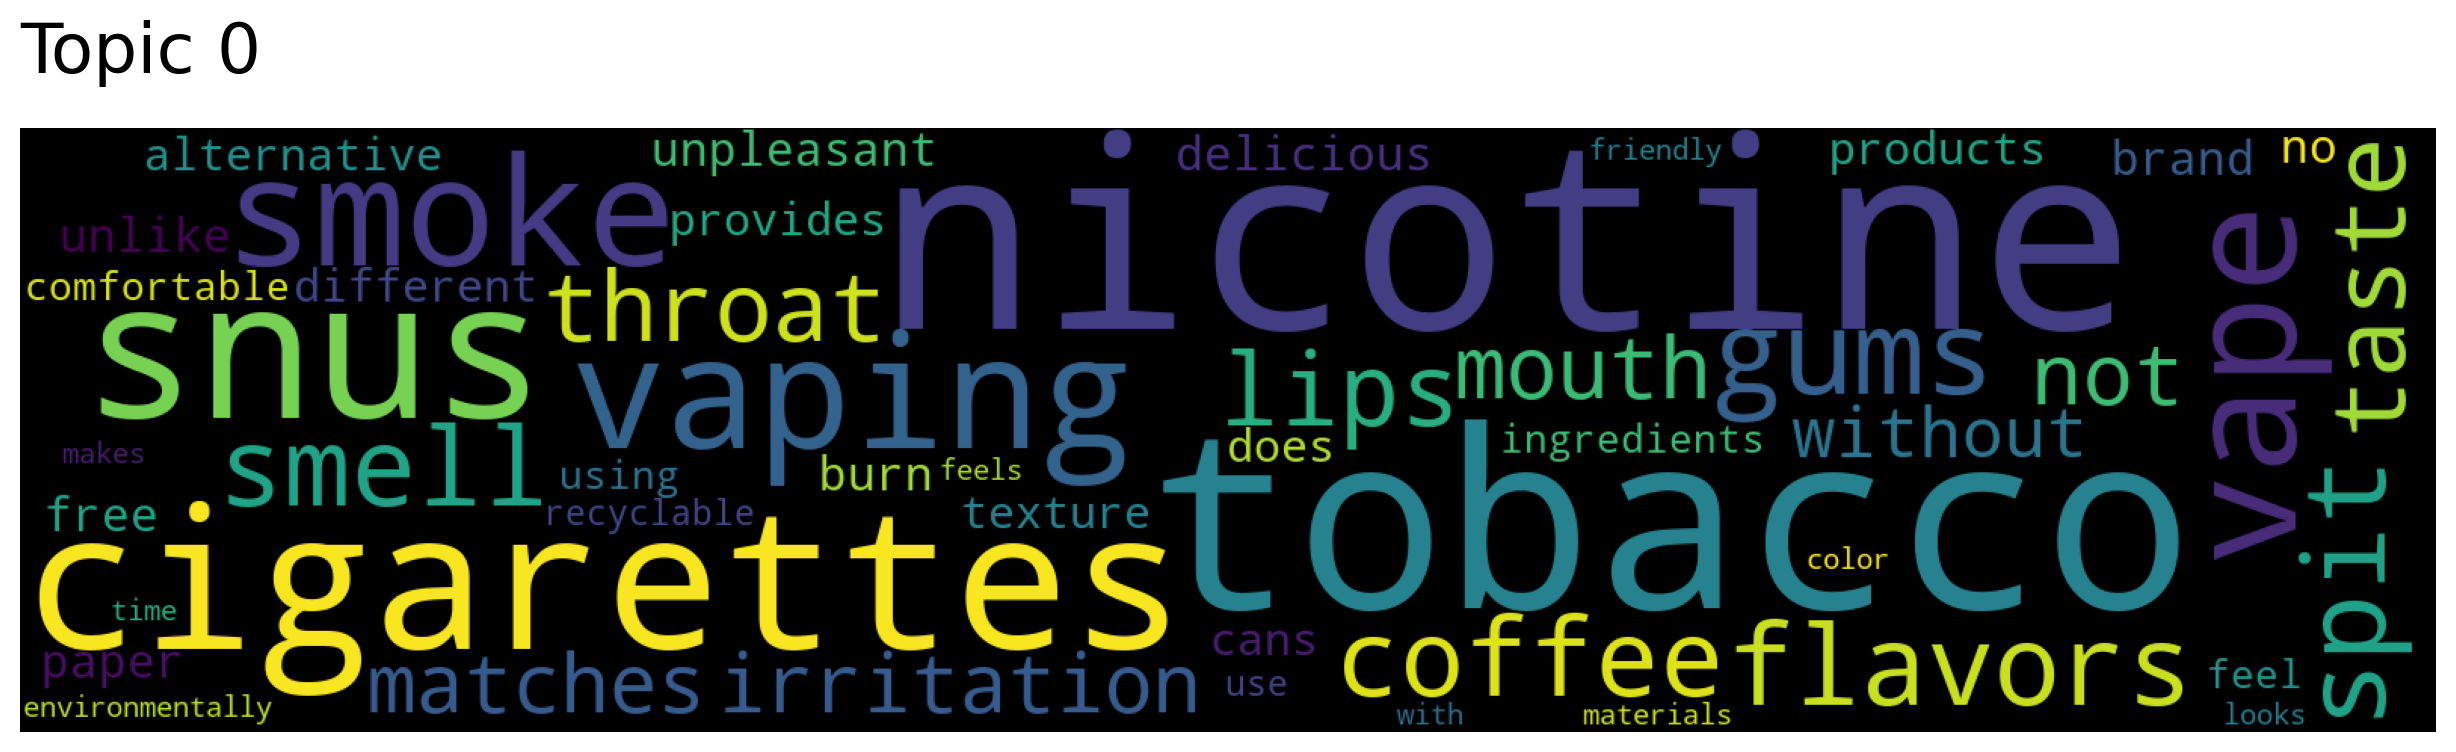

In [15]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["flavors"], num_topics=2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

# Search Documents by Topic

In [16]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=1, num_docs=5)

documents: The documents in a list, the most similar are first.

doc_scores: Semantic similarity of document to topic. The cosine similarity of the document and topic vector.

doc_ids: Unique ids of documents. If ids were not given, the index of document in the original corpus.

For each of the returned documents we are going to print its content, score and document number.

### Topic 1 has 39 claims

In [23]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=1, num_docs=39)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 65, Score: 0.7749589681625366
-----------
Has an intense taste.
-----------

Document: 66, Score: 0.7673978805541992
-----------
It tastes sweet.
-----------

Document: 4, Score: 0.7325277924537659
-----------
Has a soft texture.
-----------

Document: 30, Score: 0.7121604681015015
-----------
Has a delicious aftertaste in the mouth.
-----------

Document: 1, Score: 0.6664218902587891
-----------
Has a color that matches the taste.
-----------

Document: 31, Score: 0.6054379940032959
-----------
The smell is delicious
-----------

Document: 47, Score: 0.5991647839546204
-----------
The texture is dry.
-----------

Document: 64, Score: 0.5727103352546692
-----------
Has a variety of different flavors
-----------

Document: 28, Score: 0.5707266330718994
-----------
It feels satisfying.
-----------

Document: 46, Score: 0.5661810636520386
-----------
Moist texture
-----------

Document: 5, Score: 0.5510217547416687
-----------
Has smooth edges.
-----------

Document: 6, Score: 0

### Topic 0 has 41 claims

In [24]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=41)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 35, Score: 0.7186005711555481
-----------
Delivers nicotine through absorption. No need to suck or chew.
-----------

Document: 38, Score: 0.7031177282333374
-----------
Does not cause breath smell like cigarettes.
-----------

Document: 8, Score: 0.6856446266174316
-----------
Provides the same satisfaction as other nicotine products, e.g. cigarettes, vape, snus, heat-not-burn tobacco products, etc.
-----------

Document: 36, Score: 0.6687109470367432
-----------
Does not stain teeth or fingers like cigarettes.
-----------

Document: 60, Score: 0.6616742610931396
-----------
 No need to inhale smoke or vape (unlike, for example, cigarettes/heat-not-burn or vaping products
-----------

Document: 74, Score: 0.6454778909683228
-----------
Is an alternative to nicotine products that makes me feel that I am making a better choice.
-----------

Document: 33, Score: 0.6444804668426514
-----------
Get rid of nicotine straight away.
-----------

Document: 9, Score: 0.6407111883163452

# Semantic Search Documents by Keywords

In [19]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["cigarettes", "coffee"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 21, Score: 0.5525932668783781
-----------
Tobacco free.
-----------

Document: 33, Score: 0.3524361875546055
-----------
Get rid of nicotine straight away.
-----------

Document: 32, Score: 0.3344749806397682
-----------
Releases long-lasting nicotine.
-----------

Document: 9, Score: 0.3027979927610691
-----------
More enjoyable to use than other nicotine products, such as cigarettes, vaping, heat-not-burn tobacco products, etc.
-----------

Document: 8, Score: 0.29717538634062746
-----------
Provides the same satisfaction as other nicotine products, e.g. cigarettes, vape, snus, heat-not-burn tobacco products, etc.
-----------



# Similar Keywords

In [20]:
words, word_scores = model.similar_words(keywords=["cigarettes"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

tobacco 0.8298345328732731
smoke 0.7957741060953789
nicotine 0.7915095957483129
vaping 0.6382577102592698
vape 0.5994956528378614
snus 0.5815678416479395
gums 0.5428728177120459
coffee 0.5239812549655097
matches 0.482055824814618
lips 0.4814637860165635
smell 0.4676837381582515
flavors 0.4648767216306735
spit 0.4366200218421
products 0.42444210025310486
throat 0.42288114999624327
mouth 0.4227343829119492
paper 0.42243563280831287
burn 0.41861262514470865
cans 0.41439993806224085
time 0.4015255245453102


In [21]:
words, word_scores = model.similar_words(keywords=["coffee"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

nicotine 0.567787904266991
smoke 0.5526073585284401
cigarettes 0.5239812106965356
tobacco 0.5238974796733913
vape 0.48852047090408773
vaping 0.45347000784597113
snus 0.44366678340693677
smell 0.4343298324115417
delicious 0.41878342972901095
mouth 0.4173610294898549
heat 0.41550059054108623
burn 0.41524534461386636
flavors 0.4018469958952844
it 0.39002988930806914
paper 0.38859670774167554
time 0.3811673152428536
taste 0.37868200521017886
throat 0.3774412725606291
color 0.37714085391686925
spit 0.37542457011072716


# all-MiniLM-L6-v2

In [1]:
!pip install top2vec[sentence_transformers]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from top2vec import Top2Vec

# model = Top2Vec(documents,speed="learn", workers=2)

# * doc2vec
# * universal-sentence-encoder
# * universal-sentence-encoder-large
# * universal-sentence-encoder-multilingual
# * universal-sentence-encoder-multilingual-large
# * distiluse-base-multilingual-cased
# * all-MiniLM-L6-v2
# * paraphrase-multilingual-MiniLM-L12-v2
            
model = Top2Vec(documents, embedding_model="all-MiniLM-L6-v2",min_count=1,embedding_batch_size=4,chunk_length=10)

2022-11-07 07:02:48,511 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-11-07 07:02:48,532 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
INFO:top2vec:Downloading all-MiniLM-L6-v2 model


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

2022-11-07 07:02:52,744 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-11-07 07:02:54,447 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-11-07 07:03:01,718 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-11-07 07:03:01,732 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [5]:
model.get_num_topics()

2

In [6]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [7]:
topic_sizes

array([46, 34])

In [8]:
topic_nums

array([0, 1])

In [9]:
topic_words, word_scores, topic_nums = model.get_topics(2)

In [10]:
topic_words

array([['taste', 'flavors', 'texture', 'smell', 'delicious', 'gums',
        'lips', 'mouth', 'coffee', 'irritation', 'color', 'throat',
        'heat', 'does', 'ingredients', 'feels', 'unpleasant', 'products',
        'comfortable', 'vaping', 'has', 'smoke', 'materials', 'vape',
        'spit', 'feel', 'is', 'brand', 'unlike', 'makes', 'tobacco',
        'comes', 'cans', 'like', 'shape', 'looks', 'different',
        'nicotine', 'made', 'cigarettes', 'burn', 'it', 'time',
        'experts', 'can', 'after', 'while', 'snus', 'that', 'moments'],
       ['nicotine', 'tobacco', 'cigarettes', 'vaping', 'smoke', 'vape',
        'smell', 'gums', 'products', 'irritation', 'burn', 'cans',
        'does', 'flavors', 'spit', 'ingredients', 'coffee', 'taste',
        'alternative', 'environmentally', 'is', 'brand', 'has', 'not',
        'without', 'heat', 'than', 'can', 'etc', 'like', 'use', 'using',
        'feels', 'while', 'unlike', 'mouth', 'unpleasant', 'are',
        'other', 'or', 'differen

In [11]:
word_scores

array([[0.62061644, 0.5963075 , 0.49484387, 0.48586887, 0.48350036,
        0.4696114 , 0.46432808, 0.42952162, 0.40949303, 0.40890944,
        0.40867442, 0.40550745, 0.3955285 , 0.3943639 , 0.3931914 ,
        0.3926364 , 0.3884386 , 0.3738842 , 0.37286466, 0.37179667,
        0.37035343, 0.36595452, 0.36394066, 0.3591197 , 0.3565142 ,
        0.35249704, 0.3476802 , 0.34667256, 0.33809394, 0.3354547 ,
        0.33502042, 0.33385766, 0.32710347, 0.32162696, 0.31597638,
        0.3156544 , 0.314255  , 0.31144524, 0.3082044 , 0.3056649 ,
        0.30171084, 0.295178  , 0.2919042 , 0.2918865 , 0.29066008,
        0.2812931 , 0.28061774, 0.27923682, 0.2785666 , 0.2779951 ],
       [0.80718625, 0.6948622 , 0.6668635 , 0.592685  , 0.5391012 ,
        0.5292189 , 0.26824647, 0.26104414, 0.24150799, 0.24106583,
        0.24027717, 0.2189009 , 0.2145956 , 0.21203071, 0.2117491 ,
        0.20511769, 0.1936236 , 0.18564981, 0.18385535, 0.17926052,
        0.17465723, 0.17464289, 0.17396252, 0.1

In [12]:
topic_nums

array([0, 1])

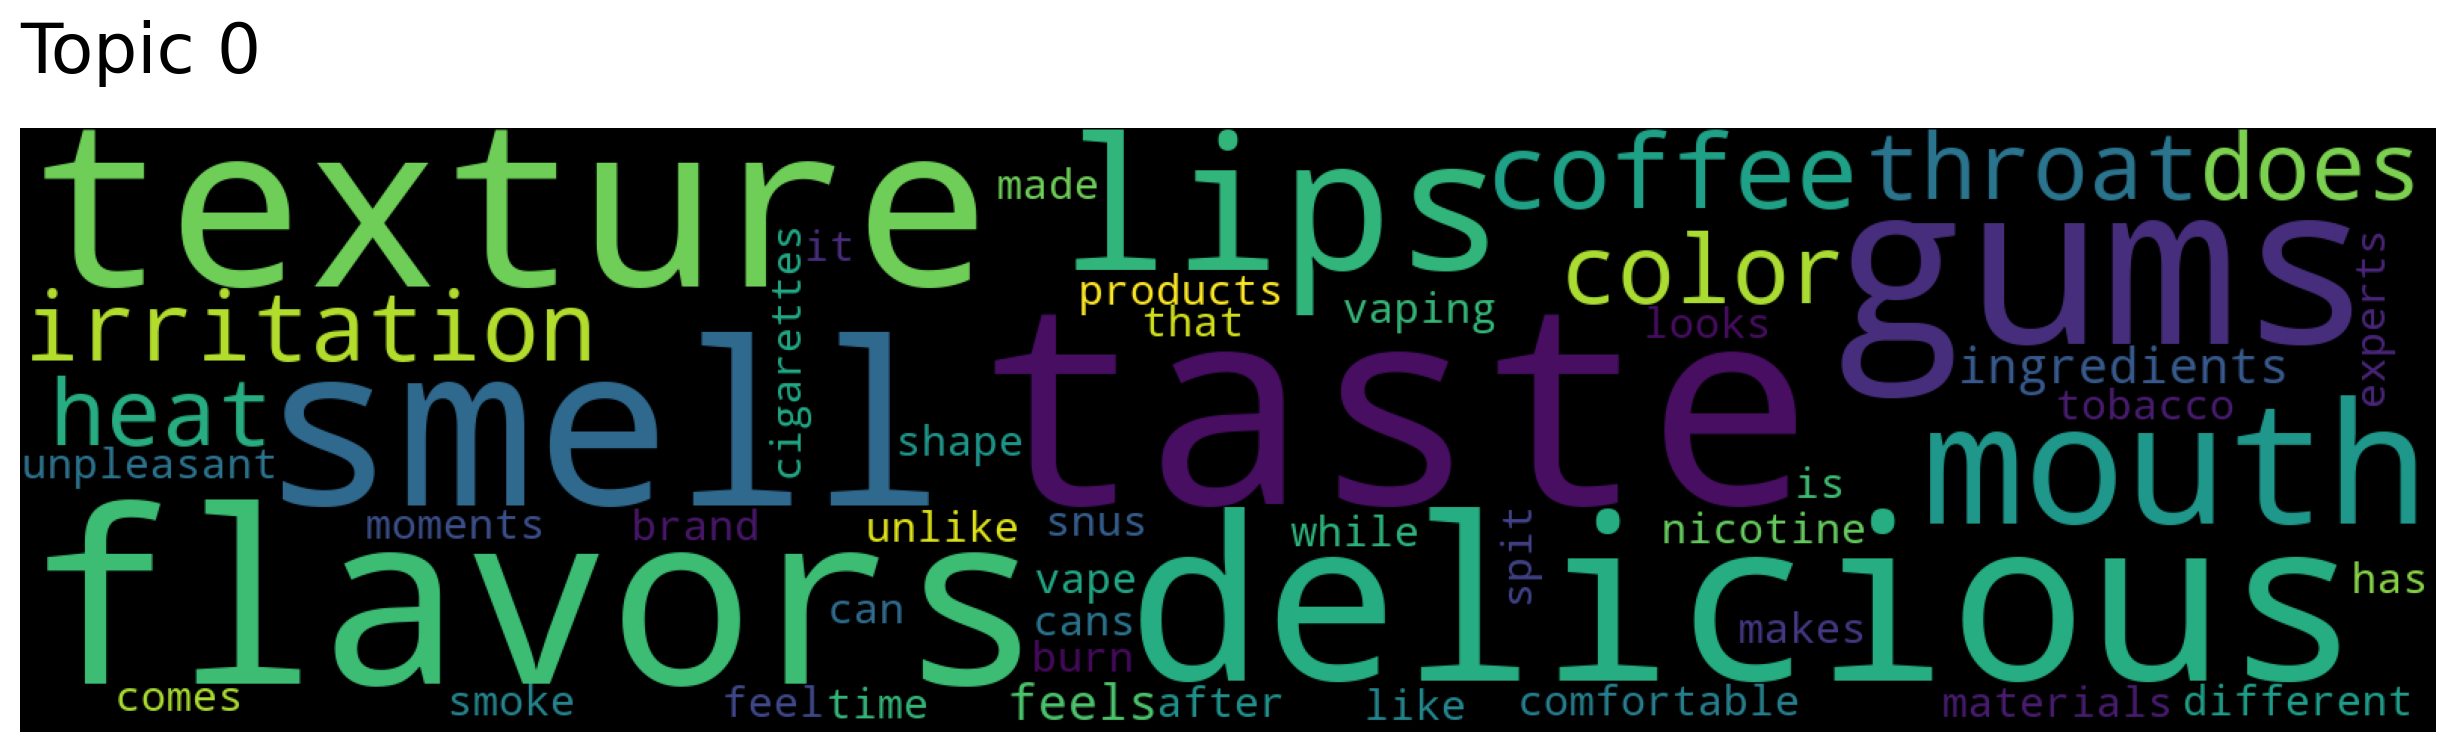

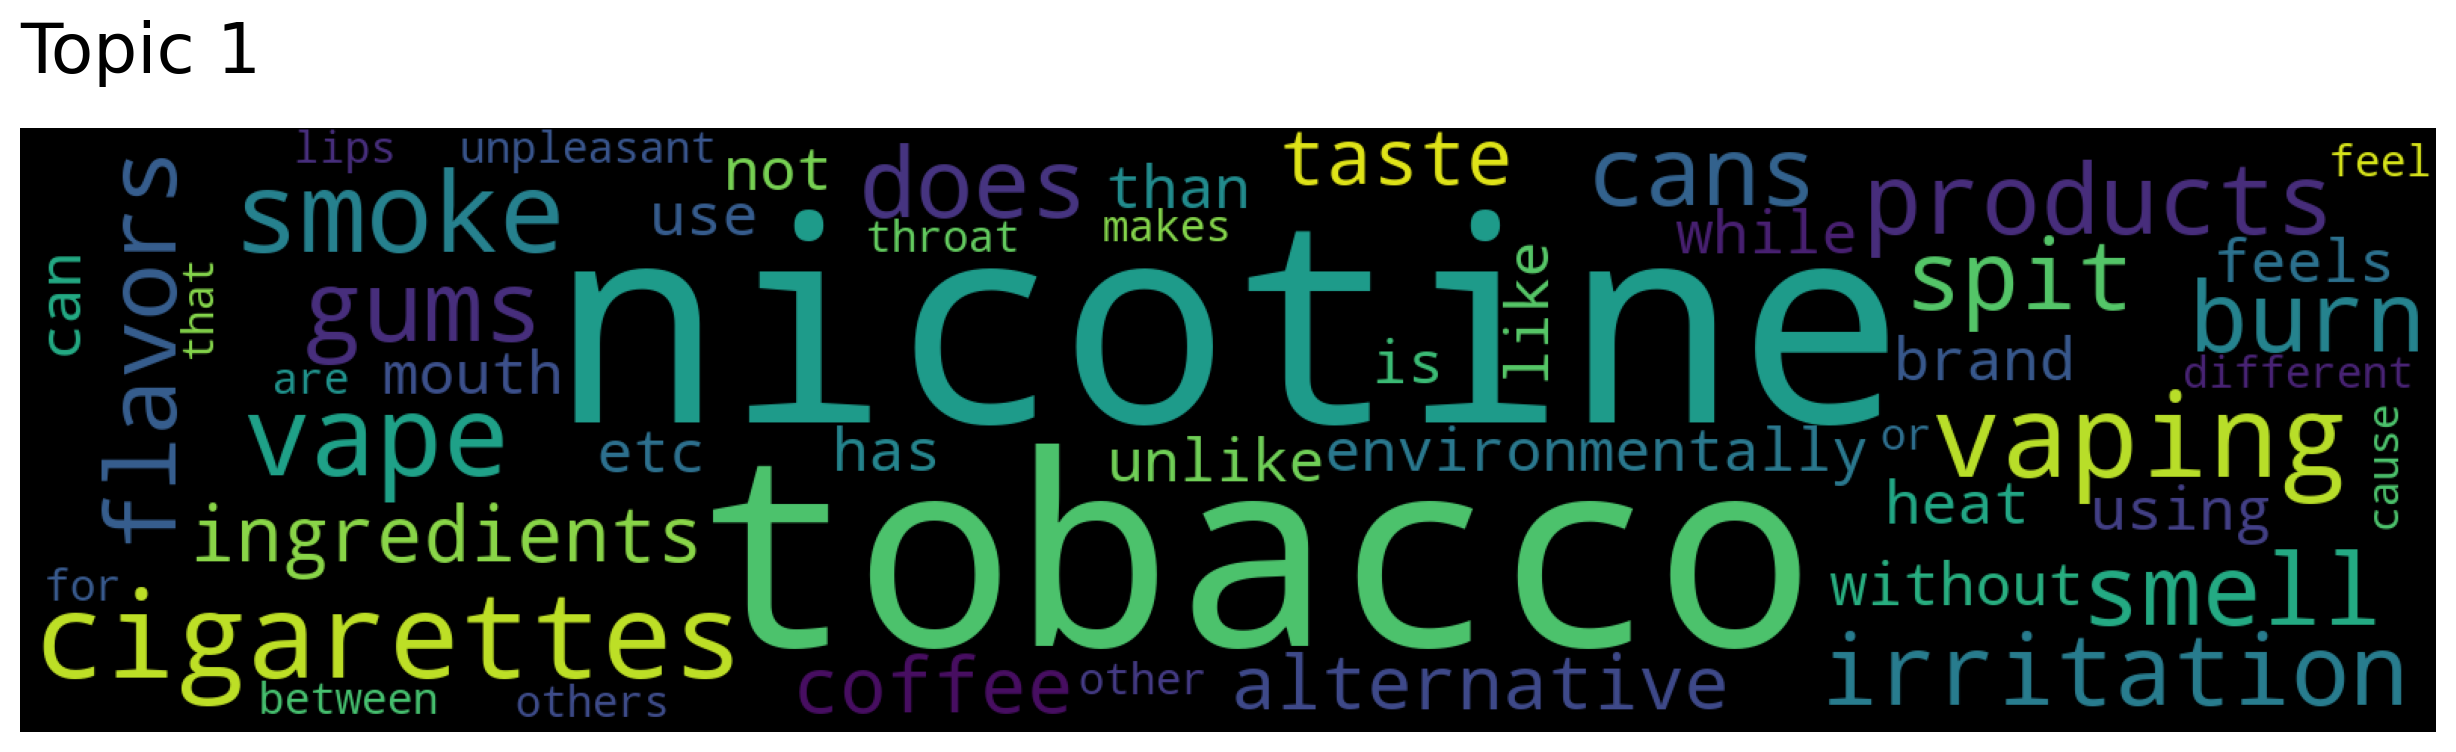

In [13]:
topic_words, word_scores, topic_nums = model.get_topics(2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

## Topic0 has 46 topics

In [16]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=46)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 65, Score: 0.7510005235671997
-----------
Has an intense taste.
-----------

Document: 1, Score: 0.7374607920646667
-----------
Has a color that matches the taste.
-----------

Document: 30, Score: 0.7063877582550049
-----------
Has a delicious aftertaste in the mouth.
-----------

Document: 66, Score: 0.6633729934692383
-----------
It tastes sweet.
-----------

Document: 64, Score: 0.6564720273017883
-----------
Has a variety of different flavors
-----------

Document: 67, Score: 0.6513909101486206
-----------
Has a cool/refreshing taste, like mint or menthol.
-----------

Document: 4, Score: 0.6411633491516113
-----------
Has a soft texture.
-----------

Document: 31, Score: 0.6095153093338013
-----------
The smell is delicious
-----------

Document: 51, Score: 0.5919047594070435
-----------
Comes in various flavors that suit certain moments, for example the taste of coffee after coffee
-----------

Document: 28, Score: 0.5847592353820801
-----------
It feels satisfying.
--

## Topic 1 has 34 topics

In [17]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=1, num_docs=34)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 9, Score: 0.8122721910476685
-----------
More enjoyable to use than other nicotine products, such as cigarettes, vaping, heat-not-burn tobacco products, etc.
-----------

Document: 8, Score: 0.7793369293212891
-----------
Provides the same satisfaction as other nicotine products, e.g. cigarettes, vape, snus, heat-not-burn tobacco products, etc.
-----------

Document: 74, Score: 0.770782470703125
-----------
Is an alternative to nicotine products that makes me feel that I am making a better choice.
-----------

Document: 32, Score: 0.7668193578720093
-----------
Releases long-lasting nicotine.
-----------

Document: 73, Score: 0.7628459930419922
-----------
Is an alternative to nicotine products that makes me feel socially acceptable.
-----------

Document: 68, Score: 0.7533245086669922
-----------
Offers a cleaner experience than cigarettes, e.g. without fire, ash, smoke or unpleasant odors.
-----------

Document: 34, Score: 0.7527177929878235
-----------
Has varying levels o